## EE 242 Lab 4 – Frequency Domain Representation of Signals - Fourier Series

Caitie DeShazo-Couchot

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [26]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from IPython.display import Audio
import IPython
import soundfile as sf
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, we will learn how to build periodic signals from component sinusoids and how to transform signals from the time domain to the frequency domain. The concepts we’ll focus on include: implementation of the Fourier Series synthesis equation, using a discrete implementation of the Fourier Transform (DFT) with a digitized signal, and understanding the relationship between the discrete DFT index k and frequency
ω for both the original continuous signal x(t). This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 3a turn in checklist

•	Lab 3a Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)




## Assignment 1 -- Generating simple periodic signals

In the first assignment, you will develop an understanding of how some periodic signals are easier to approximate than others with a truncated Fourier Series. In this lab, we’ll work with real signals and use the synthesis equation:

$$x(t)=a_0+\sum_{k=1}^N2|a_k|cos(k\omega_0t+\angle a_k)$$

In lecture, you saw that you get ripples at transition points in approximating a square wave (Gibbs phenomenon). This happens for any signals with sharp edges. This assignment will involve approximating two signals (a sawtooth and a triangle wave) that have the same fundamental frequency (20Hz).

**A.** Write a function for generating a real-valued periodic time signal given the Fourier series coefficients [$a_0~a_1~···~a_N$], the sampling frequency, and the fundamental frequency. You may choose to have complex input coefficients or have separate magnitude and phase vectors for describing $a_k$.

**B.**  Define variables for the sampling frequency (8kHz) and the fundamental frequency (20Hz). Using this sampling frequency, create a time vector for a length of 200ms.

**C.**  The sawtooth signal has coefficients as follows:
$$a_0=0.5,a_k=1/(j2k\pi) $$
Using the function from part A, create three approximations of this signal with N = 2,5,20 and plot together in a 3×1 comparison.

**D.**  A triangle signal has coefficients:
$$a_0=0.5,a_k=\frac{2sin(k\pi/2)}{j(k\pi)^2}e^{-j2k\pi/2} $$
Create three approximations of this signal with N = 2,5,20 and plot together in a 3×1 comparison.


In [27]:
# Assignment 1 - Generating Periodic Signals
#A.

#PRE: Takes coeffecients, A, sampling frequency, fs, 
#angular frequency w0, and time vector,t, as inputs.
#POST:Returns coeffecients a_k using synthesis equation.
def f_coeff(A, fs, w0, t):
    x_t = 0
    k   = len(A) - 1
    while (k>=0):
        x_t += A[k] * np.exp(1j*w0*k*t)
        k   -= 1
    return np.real(x_t)

#PRE: Takes magnitude, A_mag, phase, A_phase,frequency fs, angular 
#frequency w0, time vector,t, and initial coeffeicnt a0, as inputs.
#POST:Returns coeffecients a_k using synthesis equation.
def f_mag_phase_coeff(A_mag, A_phase, fs, w0, t, a0):
    x_t = a0
    k   = len(A_mag) - 1
    while (k>=0):
        x_t += 2*A_mag[k] * np.cos(k*w0*t*A_phase[k])
        k   -= 1
    return np.real(x_t)

#B.
fs1 = 8000 #Sampling frequency of 8KHz
f01 = 20   #Fundamental frequency f01 of 20Hz
t1  = np.arange(0, 0.2, 1/fs1) #Time Vector t1 of length 200ms
w01 = 2*np.pi*f01 #fundamental angular frequency w01 based on given fundamental frequency

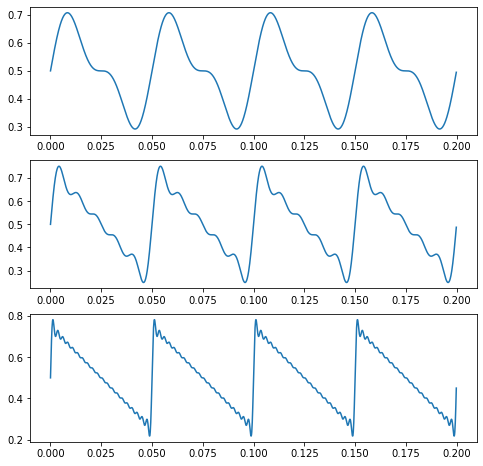

In [28]:
#C.
saw_A_20 = np.array([0.5]) #saw_A_20 is a list of 21 coeffecients.
#Appends new coeffecient from a_k from a_1 to a_20
for a in range(1, 21):
    saw_A_20 = np.append(saw_A_20, 1/(1j*2*a*np.pi))
    
saw_x2_t  = f_coeff(saw_A_20[:3], fs1, w01, t1)
saw_x5_t  = f_coeff(saw_A_20[:6], fs1, w01, t1)
saw_x20_t = f_coeff(saw_A_20, fs1, w01, t1)

#PLOTS
%matplotlib inline
fig = plt.figure(1,figsize=(8,8))
plt.subplot(311)
plt.plot(t1,saw_x2_t)
plt.subplot(312)
plt.plot(t1,saw_x5_t)
plt.subplot(313)
plt.plot(t1, saw_x20_t)

###  Discussion

You should have noticed that the second signal converges more quickly. Discuss the two reasons for this.

There are two reasons: (1) wave shape and (2) height. The wave shape, such as triangle versus sawtooth, determines if the wave is symmetrical or not. Then, the height determines how many coeffecients are going to be needed to approximate the wave.

## Assignment 2 -- Synthesizing a musical note

In this assignment, you will use the same synthesis equations to try to approximate a single note from a horn, which has the frequency characteristics illustrated below. Download the file horn11short.wav from the assignment page to compare your synthesized version to the original.

Figure below shows the frequency component of a note played by a horn.
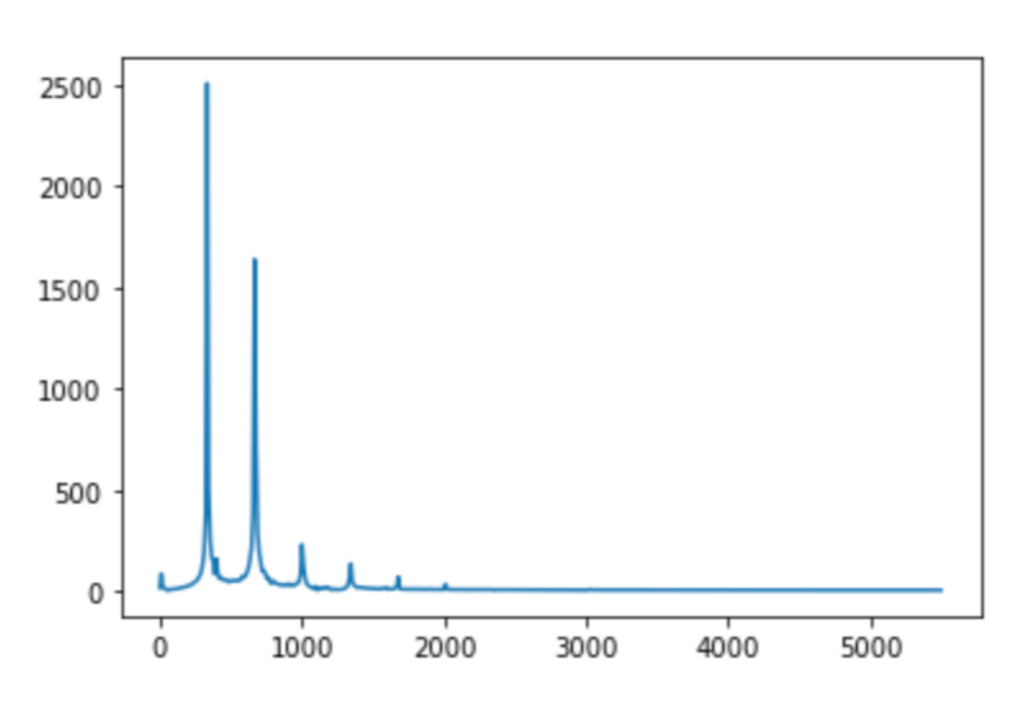

**A.**  Read in the horn signal, and use the sampling rate $f_s$ that you read in to create a time vector of length 100ms. Define the fundamental frequency to be $f_0$ = 335Hz. Create a signal that is a sinusoid at that frequency, and save it as a wav file.

**B.**  Create a vector (or two) to characterize $a_k$ using:

$$|a_k|:[2688,1900,316,178,78,38]$$

$$\angle a_k:[-1.73,-1.45,2.36,2.30,-2.30,1.13]$$

assuming $a_0=0$ and the first element of the vectors correspond to $a_1$. Use the function you created in part 1 to synthesize a signal, with $f_s$ and $f_0$ above, and save it as a wav file.

**C.**  Plot the 100ms section of the original file starting at 200ms with a plot of the synthesized signal in a 2×1 plot.

**D.** Play the original file, the single tone, and the 6-tone approximation in series.



In [29]:
# Assignment 2 - Synthesizing a musical note

#A
#reads in horn11short.wav as the sampling frequency, fs2, and the signal, horn
fs2, horn = wav.read('horn11short.wav')
t2 = np.arange(0, 0.1, 1 / fs2)
f02 = 335 
w02 = 2 * np.pi * f02
sig = np.cos(w02 * t2) 
sf.write("random.wav", sig, fs2) 

#B
A_mag = np.array([2688,1900,316,178,78,38]) 
A_phase = np.array([-1.73,-1.45,2.36,2.30,-2.30,1.13]) 
new_sig = f_mag_phase_coeff(A_mag, A_phase, fs2, w02, t2, 0)
sf.write("fourier.wav", new_sig, fs2) 

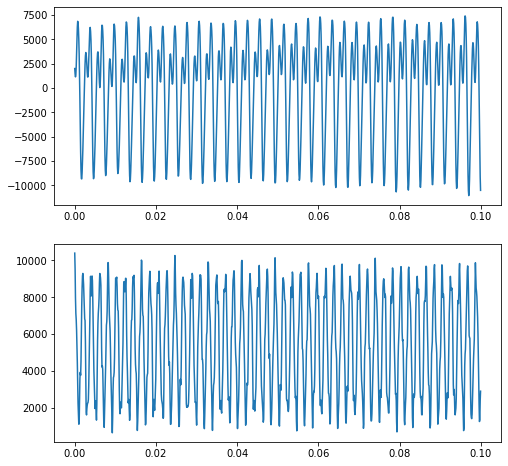

In [30]:
# Part C
fig = plt.figure(3,figsize=(8,8))
plt.subplot(211)
plt.plot(t2, horn[int(fs2 * 0.2) : int(fs2 * 0.3) + 1]) # plotted original from 200 ms to 300 ms
plt.subplot(212)
plt.plot(t2, new_sig) 

# Part D
# Original horn
Audio(data=horn, rate=fs2)

In [31]:
# Single tone (100 ms interval of original horn from 200 ms to 300 ms)
Audio(data=horn[int(fs2 * 0.2) : int(fs2 * 0.3) + 1], rate=fs2)

In [32]:
# 6-coefficients tone approximation series
Audio(data=new_sig, rate=fs2)

###  Discussion

The approximation does not sound quite like the original signal and the plot should
look pretty different. The difference in sound is in part due to multiple factors, including the truncated approximation, imperfect estimate of the parameters, and the fact that the original signal is not perfectly periodic. Try adjusting some parameters and determine what you think is the main source of distortion.

The main source of the distortion is definitely the summation of the coeffecients. With only 6, we are not getting the full sound. The more coeffecients that are included in the summation (lim -> oo) then the closer to the original sound it would become.